# Multi class Classification

When you have more than two classes as an option, it's known as multi class classification.
* This means if you have 3 different classes, its multi class classification
* It also means if you have 100 different classes its multi class classification

To practice multiclass classification we are going to build a neural network to classify different items of clothing.

Use the fashion mnist dataset built into tensorflow datasets


In [2]:
#Import sklearn before tensorflow
from sklearn.model_selection import train_test_split
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix


In [3]:
print(tf.__version__), sys.version, sklearn.show_versions()


2.4.1

System:
    python: 3.7.3 (default, Jan 22 2021, 20:04:44)  [GCC 8.3.0]
executable: /usr/bin/python3
   machine: Linux-5.10.17-v8+-aarch64-with-debian-10.9

Python dependencies:
          pip: 21.0.1
   setuptools: 54.1.2
      sklearn: 0.24.1
        numpy: 1.19.5
        scipy: 1.6.1
       Cython: 0.29.22
       pandas: 1.2.3
   matplotlib: 3.3.4
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True


(None, '3.7.3 (default, Jan 22 2021, 20:04:44) \n[GCC 8.3.0]', None)

# Get and Prepare Data

In [5]:
from tensorflow.keras.datasets import fashion_mnist

# The data was already separated into training and test data sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()



4423680/4422102 [==============================] - 1s 0us/step


In [ ]:
#Label	Description
#0	T-shirt/top
#1	Trouser
#2	Pullover
#3	Dress
#4	Coat
#5	Sandal
#6	Shirt
#7	Sneaker
#8	Bag
#9	Ankle boot

In [6]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [8]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

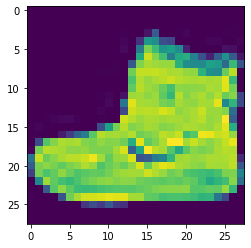

In [9]:
# Plot a single sample
plt.imshow(train_data[0])

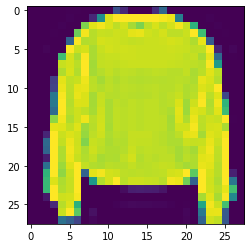

In [10]:
# Plot a single sample
plt.imshow(train_data[7])

In [12]:
train_labels[7]

2

In [15]:
# Create a small list so we can index into our training labels so they are human readable
class_names = [
    "T-shirt/top",
    "Trouser", 
    "Pullover", 
    "Dress", 
    "Coat", 
    "Sandal", 
    "Shirt", 
    "Sneaker", 
    "Bag", 
    "Ankle boot"
]

Text(0.5, 1.0, 'Coat')

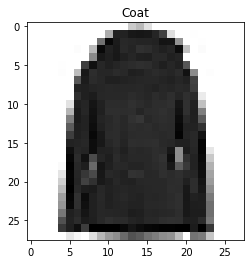

In [18]:
# Plot an image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

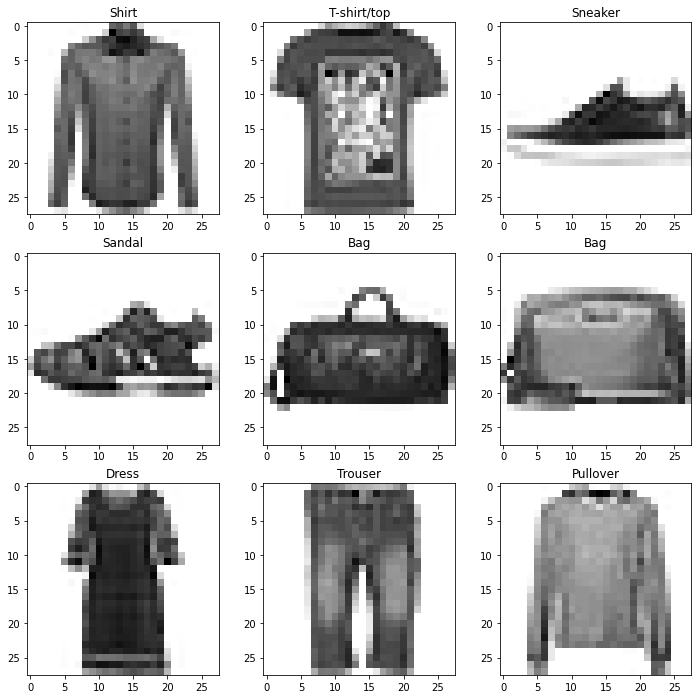

In [26]:
# Plot multiple random images of fashion mnist
import random
plt.figure(figsize=(12,12))
for i in range(9):
    ax=plt.subplot(3, 3, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])

# Building a multi class classification model


In [32]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [39]:
tf.random.set_seed(42)

# 1. Build the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
# If your labels are one hot encoded then use categorical cross entropy
# If your labels are integer form then use sparse categorical cross entropy
model_11.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# 3. Fit the model
non_norm_history = model_11.fit(
        train_data, 
        tf.one_hot(train_labels, depth=10), 
        epochs=10, 
        validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 2.7965 - accuracy: 0.1385 - val_loss: 1.7921 - val_accuracy: 0.2434
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7158 - accuracy: 0.2476 - val_loss: 1.6499 - val_accuracy: 0.2754
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6465 - accuracy: 0.2797 - val_loss: 1.6117 - val_accuracy: 0.3029
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6026 - accuracy: 0.2887 - val_loss: 1.6056 - val_accuracy: 0.3033
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6051 - accuracy: 0.3036 - val_loss: 1.5876 - val_accuracy: 0.3244
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5830 - accuracy: 0.3154 - val_loss: 1.5675 - val_accuracy: 0.3067
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5766 - accuracy: 0.3213 - val_loss: 1.6432 - val_accuracy

In [42]:
# Check the model summary
model_11.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_23 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


# Normalize the data

In [44]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [45]:
# Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they find patterns in to be between 0 and 1

# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [47]:
tf.random.set_seed(42)

# 1. Build the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
# If your labels are one hot encoded then use categorical cross entropy
# If your labels are integer form then use sparse categorical cross entropy
model_12.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# 3. Fit the model
norm_history = model_12.fit(
        train_data_norm, 
        tf.one_hot(train_labels, depth=10), 
        epochs=10, 
        validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy

In [ ]:
# All we did is normalize our data in the above, and the accuracy went up from ~30% to ~80%
# This is because neural networks prefer numbers between 0 and 1


# Plot loss curves of our models

<AxesSubplot:title={'center':'Normalized Data'}>

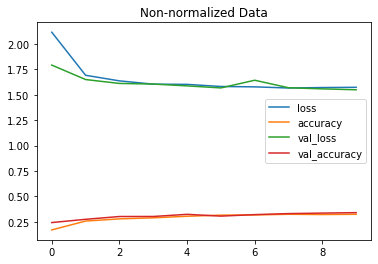

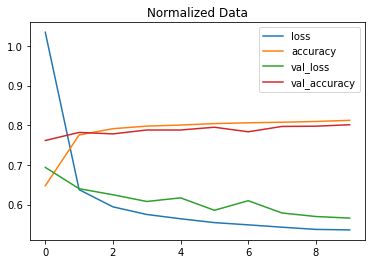

In [49]:
# Plot the non normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot the normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

In [ ]:
# When comparing the results of models, change one thing and compare the results


# Find the Ideal Learning Rate

The ideal learning rate is where the loss decreases the most


In [53]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Creatr the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)


Epoch 1/40
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy

In [58]:
1e-3 * (10**(tf.range(40)/20))

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383,
       0.03162278, 0.03548134, 0.03981072, 0.04466836, 0.05011872,
       0.05623413, 0.06309573, 0.07079458, 0.07943282, 0.08912509])>

In [70]:
10**(tf.range(40)/20)

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([ 1.        ,  1.12201845,  1.25892541,  1.41253754,  1.58489319,
        1.77827941,  1.99526231,  2.23872114,  2.51188643,  2.81838293,
        3.16227766,  3.54813389,  3.98107171,  4.46683592,  5.01187234,
        5.62341325,  6.30957344,  7.07945784,  7.94328235,  8.91250938,
       10.        , 11.22018454, 12.58925412, 14.12537545, 15.84893192,
       17.7827941 , 19.95262315, 22.38721139, 25.11886432, 28.18382931,
       31.6227766 , 35.48133892, 39.81071706, 44.66835922, 50.11872336,
       56.23413252, 63.09573445, 70.79457844, 79.43282347, 89.12509381])>

Text(0.5, 1.0, 'Finding the ideal learning rate')

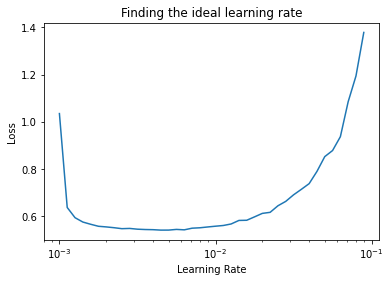

In [59]:
# Plot the learning rate decay curve
# Find where the lowest point in the curve and then go back a little bit

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

# The ideal learning rate is about 10-3 (0.001)

# Lets Refit a model with the ideal learning rate

In [63]:
tf.random.set_seed(42)

# Build the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history_14 = model_14.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy

# Evaluating our multi class classification model

To evaluate our multi class classification model we could:
* Evaluate its performance using other classification metrics such as a confusion matrix
* Assess some of its predictions through visualizations
* Improve its results by training it for longer or changing the architecture
* Save and export it for use in an application

Lets go through the top 2


In [104]:
# Prettify the confusion matrix
# Note the confusion matrix code we are about to write is a remix learn of the scikit learn plot confusion matrix
import itertools

def make_confusion_matrix (y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize the confusion matrix
    n_classes = cm.shape[0]

    # Lets prettify it
    fig, ax = plt.subplots(figsize=figsize)
    #Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(
        title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

    # Set x axis labels to the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2.
    
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
        horizontalalignment="center",
        color="black",
        size=text_size)


In [84]:
# Create our confusion matrix
# Create a confusion matrix

# Make predictions
y_probs = model_14.predict(test_data_norm) # Probs is short for prediction probabilities

# View the first 5 predictions
y_probs[:5]

array([[8.5629677e-11, 3.5362184e-13, 2.6633561e-05, 4.6356220e-08,
        5.0949580e-05, 9.6119225e-02, 8.1777600e-08, 9.1868661e-02,
        4.0604961e-03, 8.0787390e-01],
       [3.4278553e-06, 1.2899265e-16, 9.5989138e-01, 2.0516293e-07,
        1.5329245e-02, 2.4531869e-13, 2.4142899e-02, 1.1383623e-28,
        6.3271378e-04, 4.4788358e-08],
       [6.1063241e-05, 9.9657673e-01, 4.3867566e-08, 3.3405961e-03,
        1.3249637e-05, 1.4383602e-21, 8.2791248e-06, 7.3241938e-18,
        5.4812233e-08, 4.9226085e-14],
       [7.5031363e-05, 9.9053687e-01, 4.2528859e-07, 9.2231641e-03,
        1.3623285e-04, 1.8276372e-18, 2.6808397e-05, 4.8126948e-14,
        1.4521646e-06, 2.2211800e-11],
       [7.2189942e-02, 1.5495813e-06, 2.5566894e-01, 1.0363140e-02,
        4.3541390e-02, 1.1069239e-13, 6.1693019e-01, 6.7545710e-23,
        1.3049125e-03, 1.2140199e-09]], dtype=float32)

(array([7.5031363e-05, 9.9053687e-01, 4.2528859e-07, 9.2231641e-03,
        1.3623285e-04, 1.8276372e-18, 2.6808397e-05, 4.8126948e-14,
        1.4521646e-06, 2.2211800e-11], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 'Trouser')

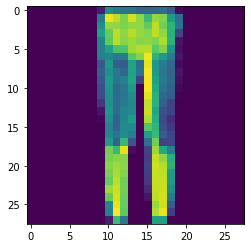

In [88]:
index_to_view = 3
predicted_index = tf.argmax(y_probs[index_to_view])
plt.imshow(test_data[index_to_view])
y_probs[index_to_view], predicted_index, class_names[predicted_index]

In [90]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis = 1)
y_preds

array([9, 2, 1, ..., 3, 1, 5])

In [92]:
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

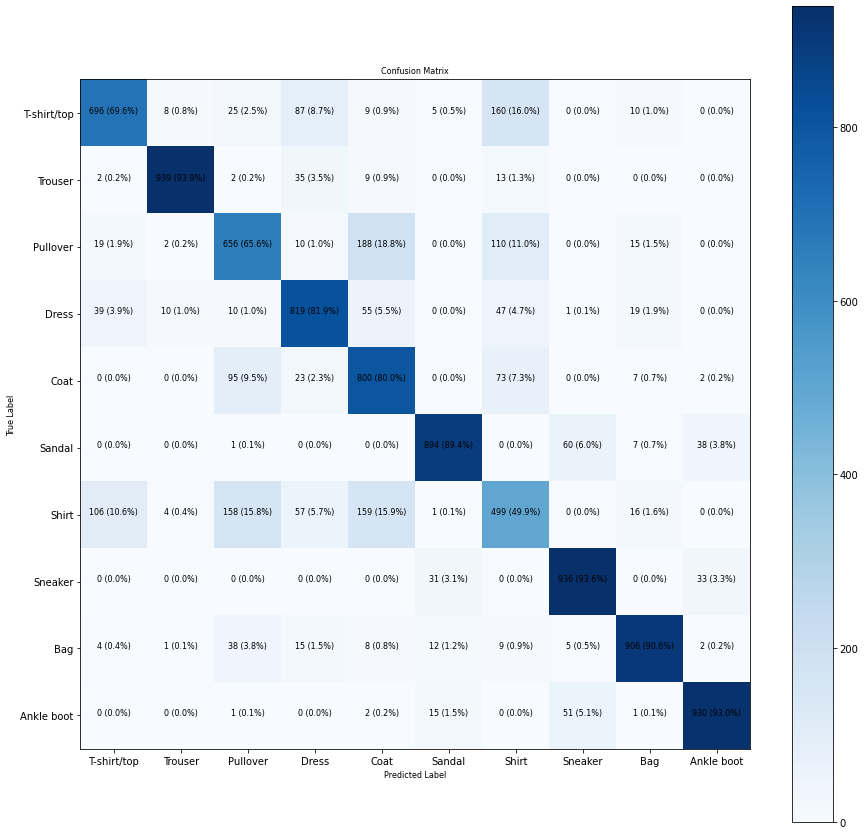

In [105]:
# Create our confusion matrix
# Need to create our prediction probabilities to binary form
make_confusion_matrix(test_labels, y_preds, figsize=(15,15), classes=class_names, text_size=8)

# Visualizing Random Samples

Often when working with images and other forms of data its a good idea to visualize as much as possible to develop a further undertsanding of the data and the inputs and outpuits of your models.

Lets create a fun little function for:
* Plot a random image
* Make a prediction on said images
* Label the plot with the truth label and the predicted label


In [146]:
import random
def plot_random_image(model, images, true_labels, classes, figsize=(10,10)):
    """
    Picks a random image, plots it, and labels it with a prediction and truth label
    """
    #plt.figsize=figsize
    plt.subplots(figsize=figsize)
    for j in range(6):
        # Setup random integer to pick a random index from the test data set to predict on
        i = random.randint(0, len(images))
        plt.subplot(2, 3, j+1)
        plt.title(f"Index {i}")

        # Create predictions and targets
        target_image = images[i]
        pred_probs = model.predict(target_image.reshape(1, 28, 28))
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[i]]

        # Plot the image
        plt.imshow(target_image, cmap=plt.cm.binary)

        # Change the color of the titles depending on if the prediction is right or wrong
        if pred_label == true_label:
            color="green"
        else:
            color="red"

        # Add xlabel information (prediction/true label)
        plt.xlabel(
            f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})",
            color=color) 





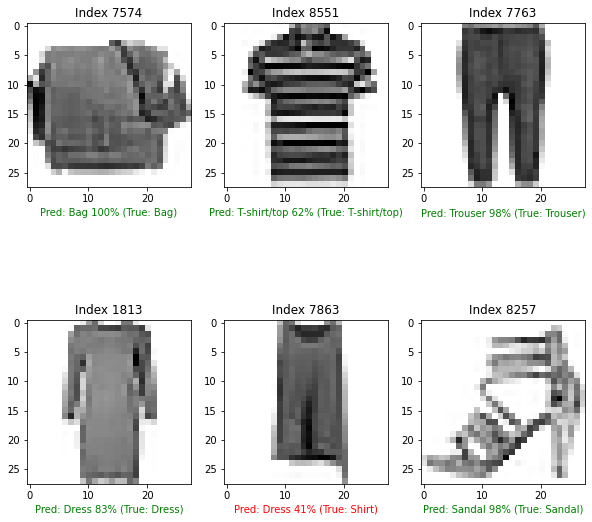

In [147]:
plot_random_image(model_14, images=test_data_norm, true_labels=test_labels, classes=class_names)

# What Patterns is our model Learning (Weights and Biases)

In [148]:
# Find the layers of our most recent model
model_14.layers

In [151]:
# Extract a particular layer
model_14.layers[1]

In [156]:
# Find the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()
weights, weights.shape

(array([[ 0.71502656, -0.06077078, -0.99763274, -1.0484327 ],
        [ 0.2773218 , -0.47155482, -0.5291662 ,  0.02329223],
        [ 0.7752441 ,  0.5402775 , -1.1288577 , -0.742618  ],
        ...,
        [-0.39453515,  0.47628638, -0.22641586,  0.25505957],
        [-0.40515724,  0.6181019 ,  0.23928428, -0.50387543],
        [ 0.23884682,  0.11606961, -0.1213135 ,  0.04352418]],
       dtype=float32),
 (784, 4))

In [157]:
# Now lets check out the bias vector
biases, biases.shape

(array([ 2.4486095e-02, -6.1507034e-04, -2.7230090e-01,  8.1124920e-01],
       dtype=float32),
 (4,))

### Weights and Biases

* Every neuron has a bias vector. 
* Each of these is paired with a weights matrix. 
* The bias vector gets initialized as zeros (at least in the case of a tensorflow dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.


In [158]:
model_14.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_41 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


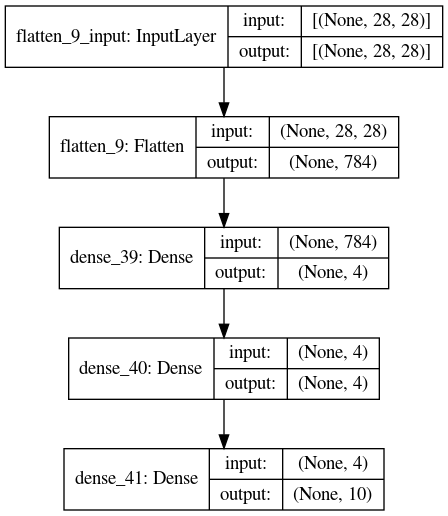

In [160]:
# Let's check out another way of viewing our deep learning model
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)